# Modelling Predator-Prey Systems in Python

In this notebook will look at a mathematical model used for predator-prey systems. The model we will look at is known as the __Lotka-Volterra__ model.

We will do this by first building a deterministic, idealized model for the predator-prey systems. Towards the end of the notebook, we will then introduce __stochastics__ into the equations - so that the model more accurately captures the noise found in real world scenarios. 

## The Lotka-Volterra Equations

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/79752d662d4760abcc84c6f0bb94d708f17ff442)

### Defining the equations

From the above equation, the parameters can be thought of as the following:

* $\frac{dx}{dt}$ = growth rate of rabbit population
* $\frac{dy}{dt}$ = growth rate of fox population

* $x$ = rabbit (prey) population 
* $y$ = fox (predator) population

* $\alpha$ = growth rate of rabbits
* $\beta$ = death rate of rabbits due to predatation from foxes
* $\gamma$ = natural death rate of foxes
* $\delta$ = factor describing how many consumed rabbits create a new fox

### Physical Meaning of the Equations

From the above equations, we can conclude that the Lotka-Volterra model makes several assumptions for the dynamics of predator-prey systems. Some of which are as follows:

* The rabbit population is provided with limitless food
* The rate of change of the populations are proportional to their size
* The foxes eat only the rabbits, and are entirely dependent on them as a food source
* The foxes have unlimited appetite


# Modelling Stochasticisty

In introducing stochasticity to our models, there are numerous ways that we can choose to model __randomness__. In this notebook, we will model our noise using a very simple uniform distribution with a mean about zero.

For further work, it may be worthwhile to model the noise using __Brownian motion__, and then comparing this to the white noise randomness generated by the __Weiner__ equation, and then finally model the noise using the coloured noise generated by the __Levy__ equations.

# Deterministic Lotka-Volterra Model

Here we will simulate the behaviour of rabbit and fox populations using the deterministic Lotka-Volterra model, without any stochastic noise added to the simulation.

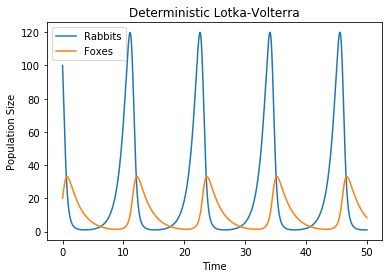

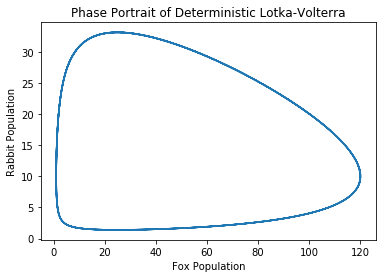

In [5]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20)

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Birth Rate')
    plt.show()

## Discussion

From the first graph, we observe an oscillatory relationship between the rabbits and the foxes. As the rabbit population grows in size, the foxes have more to eat. This creates more foxes. As there are now more foxes, they more rapidly consume the rabbit population. As the rabbit population is depleted by the large number of foxes, the foxes have less to eat and are therefore depleted as well.

From the second graph, we observe a closed loop for the phase portrait. This demonstrates the __stability__ of these differential equations, subject to the Euler method. 

### Errors in the Simulation

The errors in our numerical simulation are due to the integration method chosen for evaluating the rabbit and fox populations. 

The numerical integration method chosen was the Euler method. Inherrent errors within this method include the stepsize chosen, which contributes to a discretization error, and any rounding errors.

The dominant error in our program is the discretization error, which can be minimized by decreasing the step-size. It is worth noting that when the step-size is larger, the closed-loop observed becomes a spiral, and the populations diverge. This illustrates that the equations are mathematically "__unstable__".

This can be further illustrated by evaluating the Jacobian matrix of the populations.

## Steady States of the Populations

The steady state of the populations arises when the growth rates are equal to zero.

At this state of equilibrium, we arive at two fixed points for the rabbit and fox populations:

$x = \frac{c}{d}$

$y = \frac{a}{b}$

Inputting these values as the initial conditions, the populations remain steady over time.

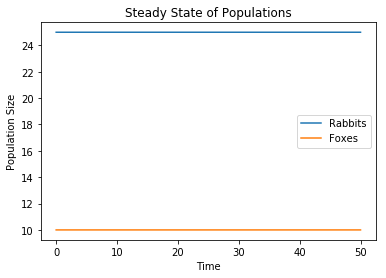

In [10]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.001
# amplitude of noise term
amp = 0.
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(c/d)
y.append(a/b) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x + StochasticTerm(amp))
    y.append(next_y)

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Steady State of Populations')
    plt.show()

## Perturbing the Rabbit Population out of Steady State

Here we start with initial populations that correspond to the steady state. However, as we iterate through the Euler method, we peturb the newly created rabbit populations by a stochastic term. 

We observe that the noise generated by the stochastic term peturbs the rabbit population out of its steady state, which then causes the fox population to start oscillating in sync with the rabbit population.

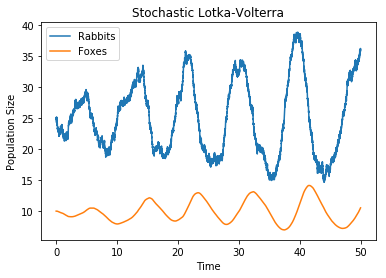

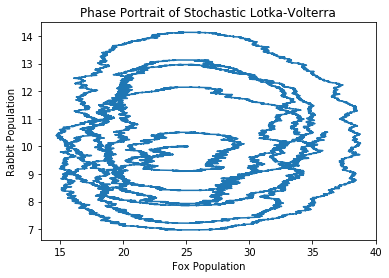

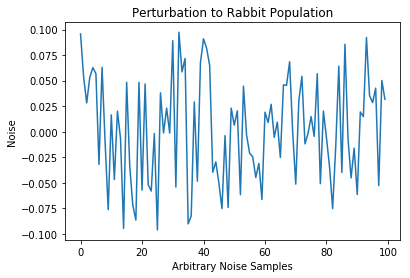

In [32]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.001
# amplitude of noise term
amp = 0.1
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(c/d)
y.append(a/b) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x + StochasticTerm(amp))
    y.append(next_y)

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Rabbit Population')
    plt.show()

# Applying noise to the Lotka-Volterra Parameters

Here, we apply noise to the birth rate of rabbits. That is, noise is specifically applied to the parameter "a" in the lotka-volterra equations.

## Stochastic Birth Rate

Here, the value of the birth rate a is defined to be stochastic in the integration.

We define a as follows:

a = a + StochasticTerm

Therefore, the value of a has a mean about the deterministic value of a, but it has an added noise to it that varies proportionally with the birth rate.

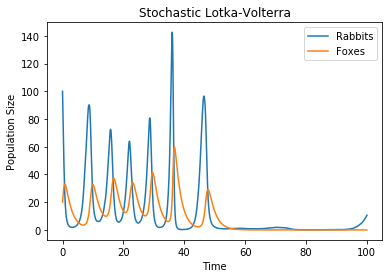

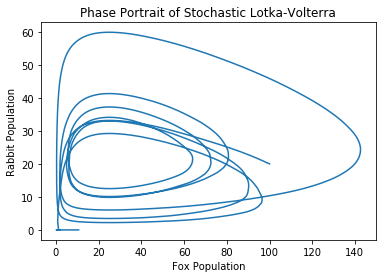

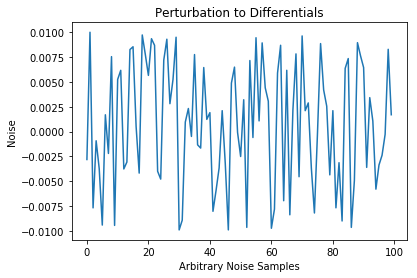

In [8]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.001
# amplitude of noise term
amp = 0.01
# the time at which the simulation ends
end_time = 100

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(100)
y.append(20) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
    a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x)
    y.append(next_y)

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Differentials')
    plt.show()

## Adding noise to populations after integration

After computing the value of x and y through the Euler method, I then add noise to these values and store them. The differentials in the next iteration of the Euler method are then evaluated using these stochastic values of x and y.

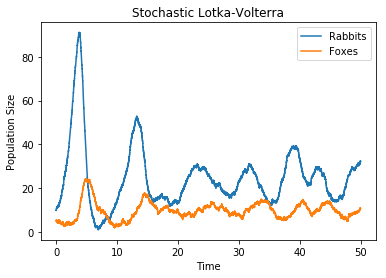

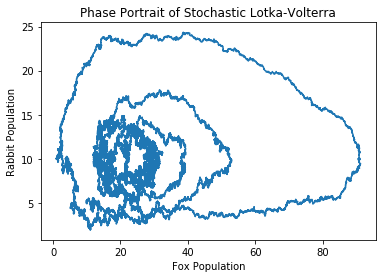

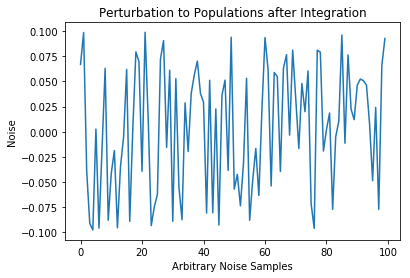

In [59]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.001
# amplitude of noise term
amp = 0.1
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize rabbits (x) and foxes (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of rabbits
a = 1
# death rate of rabbits due to predation
b = 0.1
# natural death rate of foxes
c = 0.5
# factor that describes how many eaten rabbits give birth to a new fox
d = 0.02

""" euler integration """

# initial conditions for the rabbit (x) and fox (y) populations at time=0
x.append(10)
y.append(5) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x + StochasticTerm(amp))
    y.append(next_y + StochasticTerm(amp))

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Rabbits', 'Foxes'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Fox Population')
    plt.ylabel('Rabbit Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Populations after Integration')
    plt.show()

## Discussion

Here, we observe that the populations start out relatively stable, but as the simulation evolves the populations begin to oscillate with greater and greater amplitude as the rabbit population is continuously subject to the uniformly distributed noise.

Once the rabbit population is perturbed out of its steady state, the fox population experiences a non-zero change to its differential, which perturbs it also out of its steady state. Therefore, if a small change is made to only one species, the other species will also be perturbed out of its steady state. This then causes both species to exhibt the oscillatory behaviour observed earlier in this notebook.

## Comparison of Model with Empirical Evidence

Here is a graph of an empircally recorded predator-prey system, of the Canadian lynx and snowshoe hare pelt-trading records collected by the Hudson Bay Company over almost a century:

![alt text](https://services.math.duke.edu/education/ccp/materials/engin/predprey/lynxhare.gif)

We observe stochasticisty in the discrete data points collected, and a oscillatory relationship between the populations of the two species. This is in agreement with the Lotka-Volterra models constructed above.

## Conclusions

In this notebook we have discussed the Lotka-Volterra model for the dynamics of predator-prey systems. In the first section, we created a model which illustrated the oscilatory relationship between the populations. The obtained results agree with the oscilatory relationship found in nature, as illustrated by the empircal evidence above.

We then evaluated the steady states of the populations, where niether population changed overtime.

Towards the end of the notebook, we introduced stochastic noise into our model and showed that by introducing noise to one of the steady populations, both species are perturbed out of their steady states, and begin to oscillate.

# Further Improvements

* Include a model of seasons, in which the stochastic lotka-volterra rate parameters remain constant for a series of cycles, rather than fluctuating with each time-step.
* Consider perturbing all the parameters to see how they behave.
* Try to skew the noise

## References

[1] - Freedman, H. I. (1980). Deterministic Mathematical Models in Population Ecology. Marcel Dekker.

[2] - Brauer, F.; Castillo-Chavez, C. (2000). Mathematical Models in Population Biology and Epidemiology. Springer-Verlag.

[3] - Hoppensteadt, F. (2006). "Predator-prey model". Scholarpedia. p. 1563.